<a href="https://colab.research.google.com/github/sssiyam-sudo/MasterThesisWork/blob/main/alternativedata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all the necessary libraries & packages.

In [72]:
import os
import pandas as pd
import numpy as np
from math import sqrt
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn import preprocessing , metrics , model_selection
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.feature_selection import SelectKBest ,chi2
from sklearn.metrics import mean_squared_error , classification_report 

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold , ShuffleSplit

In [73]:
df = pd.read_csv('/content/drive/MyDrive/ThesisWork/alternativeDataset.tsv', sep='\t')

#-----------------
#-----------------
#-----------------

-------------------------------------
## **Data exploration and cleaning.**
-------------------------------------

In [74]:
df.head()

,Study ID,Patient ID,Sample ID,Age at Which Sequencing was Reported (Years),Patient Current Age,Age Greater than Median,Cancer Type,Cancer Type Detailed,Ethnicity Category,Extrapulmonary,...,Sample Class,Number of Samples Per Patient,Sample Type,Sex,Site,Smoking Status,Stage at Draw,Successful ctDx Lung,TMB (nonsynonymous),Tumor Purity
0,nsclc_ctdx_msk_2022,MSK-L-001,MSK-L-001-001A,NaN,NaN,False,Non-Small Cell Lung Cancer,Lung Squamous Cell Carcinoma,NaN,NaN,...,cfDNA,1,Metastasis,Male,MSK,True,4.0,True,NaN,NaN
1,nsclc_ctdx_msk_2022,P-0016223,MSK-L-002-001B,NaN,51.0,False,Non-Small Cell Lung Cancer,Non-Small Cell Lung Cancer,Non-Spanish; Non-Hispanic,True,...,cfDNA,9,Metastasis,Male,MSK,True,4.0,True,NaN,NaN
2,nsclc_ctdx_msk_2022,P-0016223,MSK-L-002-002,NaN,51.0,False,Non-Small Cell Lung Cancer,Non-Small Cell Lung Cancer,Non-Spanish; Non-Hispanic,True,...,cfDNA,9,Metastasis,Male,MSK,True,4.0,True,NaN,NaN
3,nsclc_ctdx_msk_2022,P-0016223,MSK-L-002-003,NaN,51.0,False,Non-Small Cell Lung Cancer,Non-Small Cell Lung Cancer,Non-Spanish; Non-Hispanic,True,...,cfDNA,9,Metastasis,Male,MSK,True,4.0,True,NaN,NaN
4,nsclc_ctdx_msk_2022,P-0016223,MSK-L-002-004,NaN,51.0,False,Non-Small Cell Lung Cancer,Non-Small Cell Lung Cancer,Non-Spanish; Non-Hispanic,True,...,cfDNA,9,Metastasis,Male,MSK,True,4.0,True,NaN,NaN


In [75]:
df.rename(columns = {'Study ID':'Study_ID', 'Patient ID':'Patient_ID', 'Age Greater than Median' : 'Age_Greater_than_Median',
                     'Sample ID':'Sample_ID' , 'Age at Which Sequencing was Reported (Years)':'Diagnosis_Age' ,
                     'Patient Current Age' : 'Current_age' ,
                     'Cancer Type':'Cancer_Type' , 'Cancer Type Detailed':'Cancer_Type_Detailed' ,
                     'Ethnicity Category' : 'Ethnicity', 'Metabolic Tumor Volume': 'Metabolic_Tumor_Volume' ,
                     'Metastatic Site' : 'Metastatic_Site', 'MSI Score' : 'MSI_Score' , 'MSI Type' : 'MSI_Type' ,
                     'Fraction Genome Altered':'FGA' , 
                     'Histology' : 'Histology'  , 'Gene Panel':'Gene_Panel' , 'Primary Tumor Site' : 'Primary_Tumor_Site' ,
                     'Lines of treatment':'Lines_of_treatment' , 'Mutation Count':'Mutation_Count' , 
                     'Mutation Count' :'Mutation_Count' , 'Oncotree Code':'Oncotree_Code', 'Patient Display Name' : 'PatientDisplayName',

                     'Overall Survival (Months)':'OverallSurvival(Months)' , 'Overall Survival Status':'OverallSurvivalStatus' ,

                     'Sample Class' : 'Sample_Class' , 'Race Category' : 'Race_Category' , 'Prior Treatment' : 'Prior_Treatment' ,
                     'Number of Samples Per Patient':'Number_of_Samples_Per_Patient' , 'Sex':'Gender' ,
                     'Stage at Draw' : 'Stage_at_Draw' , 'Sample Type' : 'Sample_Type' , 'Successful ctDx Lung' : 'SuccessfulctDxLung ',
                     'Smoking Status' : 'Smoker' , 'TMB (nonsynonymous)':'TMB(nonsynonymous)',
                     'Tumor Purity': 'Tumor_Purity'}, inplace = True)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2621 entries, 0 to 2620
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Study_ID                       2621 non-null   object 
 1   Patient_ID                     2621 non-null   object 
 2   Sample_ID                      2621 non-null   object 
 3   Diagnosis_Age                  942 non-null    object 
 4   Current_age                    2233 non-null   float64
 5   Age_Greater_than_Median        2591 non-null   object 
 6   Cancer_Type                    2621 non-null   object 
 7   Cancer_Type_Detailed           2621 non-null   object 
 8   Ethnicity                      2218 non-null   object 
 9   Extrapulmonary                 1040 non-null   object 
 10  FGA                            953 non-null    float64
 11  Gene_Panel                     2621 non-null   object 
 12  Histology                      2611 non-null   o

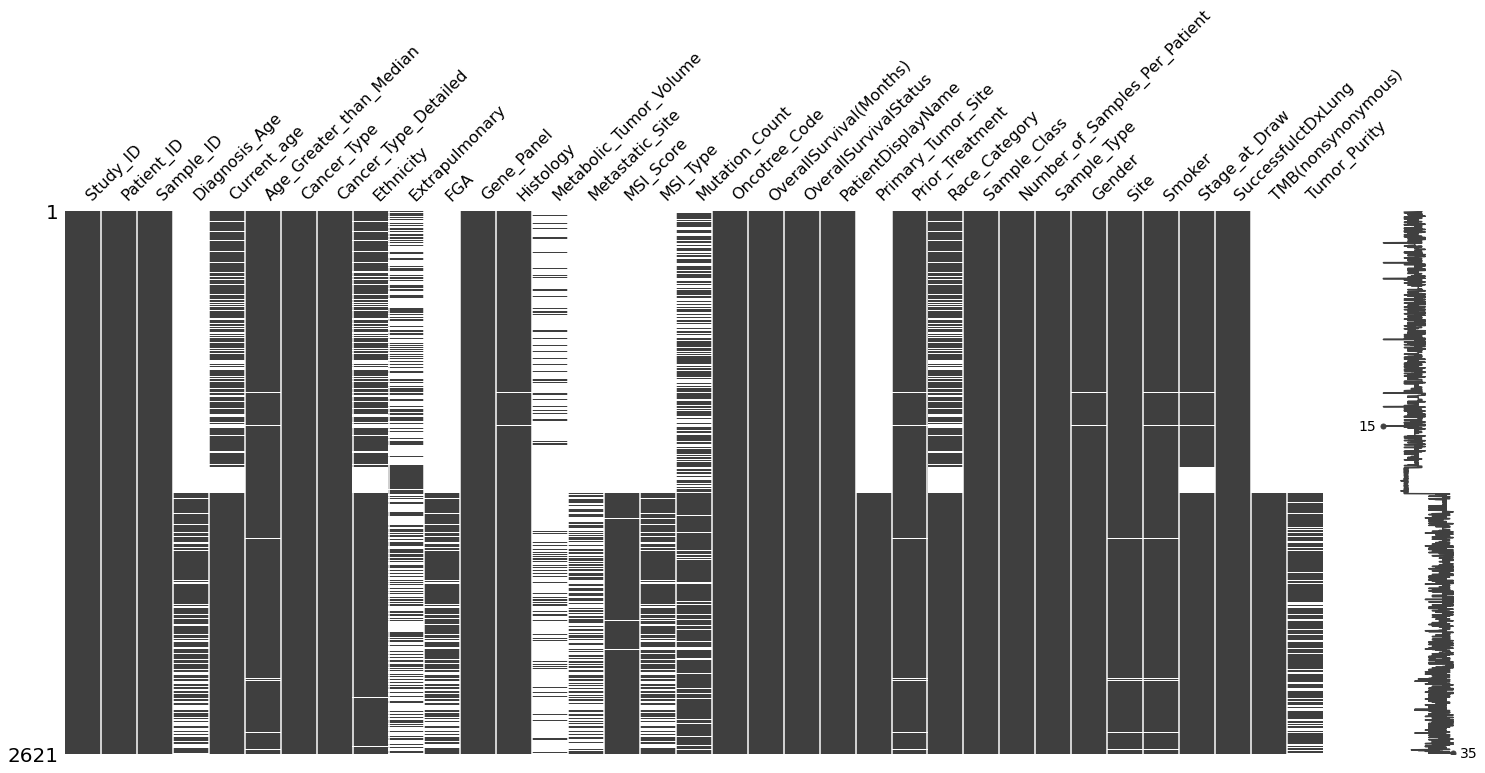

In [ ]:
msno.matrix(df)

In [76]:
df.drop(df.columns[[3,9,10,13,14,15,16,22,24,33,34]], axis=1, inplace=True)
df = df.dropna()
options = ['LUAD', 'NSCLC' , 'LUSC' , 'CUP'] 
df = df.loc[df['Oncotree_Code'].isin(options)] 

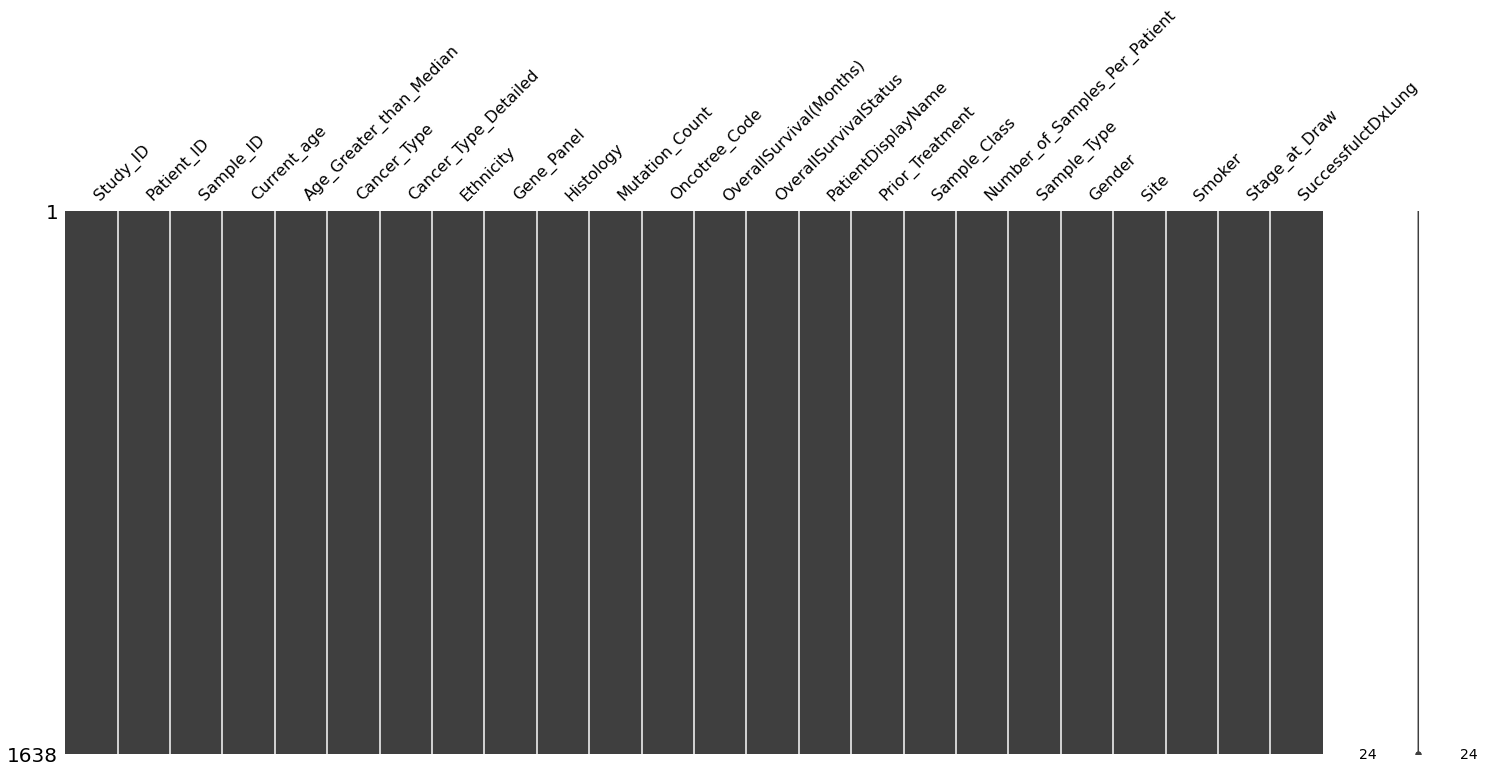

In [ ]:
msno.matrix(df)

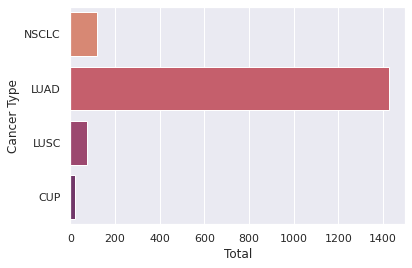

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(y="Oncotree_Code", data=df, palette="flare")
plt.ylabel('Cancer Type')
plt.xlabel('Total')
plt.show()

Number of cases: 1638
Distribution:
LUAD     1427
NSCLC     118
LUSC       73
CUP        20
Name: Oncotree_Code, dtype: int64


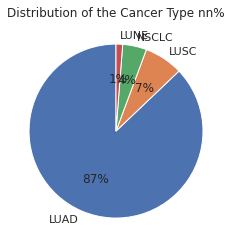

In [ ]:
#Basic info about data
print("Number of cases:", len(df))
print("Distribution:")
print(df.Oncotree_Code.value_counts())
plt.pie(list(df.Oncotree_Code.value_counts()/len(df.Oncotree_Code)), startangle=90, labels = ['LUAD', 'LUSC','NSCLC','LUNE'] ,autopct='%1.0f%%')
plt.title('Distribution of the Cancer Type nn%')
plt.show()

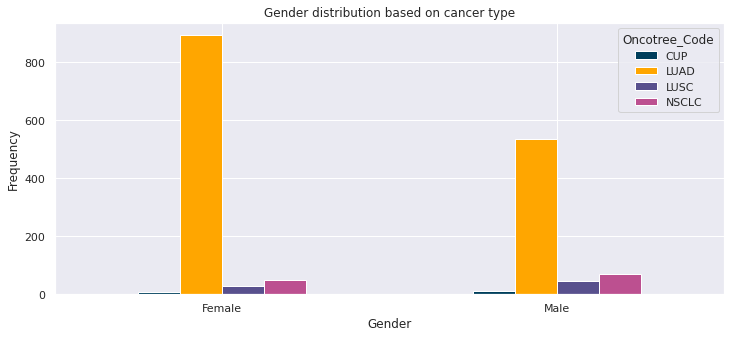

In [ ]:
pd.crosstab(df.Gender,df.Oncotree_Code).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Gender distribution based on cancer type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

#-----------------
#-----------------
#-----------------

----------------------------
# **FEATURE** **SELECTION.**
----------------------------

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/ThesisWork/alternativeDataset.tsv', sep='\t')

In [ ]:
#@title
df2.rename(columns = {'Study ID':'Study_ID', 'Patient ID':'Patient_ID', 'Age Greater than Median' : 'Age_Greater_than_Median',
                     'Sample ID':'Sample_ID' , 'Age at Which Sequencing was Reported (Years)':'Diagnosis_Age' ,
                     'Patient Current Age' : 'Current_age' ,
                     'Cancer Type':'Cancer_Type' , 'Cancer Type Detailed':'Cancer_Type_Detailed' ,
                     'Ethnicity Category' : 'Ethnicity', 'Metabolic Tumor Volume': 'Metabolic_Tumor_Volume' ,
                     'Metastatic Site' : 'Metastatic_Site', 'MSI Score' : 'MSI_Score' , 'MSI Type' : 'MSI_Type' ,
                     'Fraction Genome Altered':'FGA' , 
                     'Histology' : 'Histology'  , 'Gene Panel':'Gene_Panel' , 'Primary Tumor Site' : 'Primary_Tumor_Site' ,
                     'Lines of treatment':'Lines_of_treatment' , 'Mutation Count':'Mutation_Count' , 
                     'Mutation Count' :'Mutation_Count' , 'Oncotree Code':'Oncotree_Code', 'Patient Display Name' : 'PatientDisplayName',

                     'Overall Survival (Months)':'OverallSurvival(Months)' , 'Overall Survival Status':'OverallSurvivalStatus' ,

                     'Sample Class' : 'Sample_Class' , 'Race Category' : 'Race_Category' , 'Prior Treatment' : 'Prior_Treatment' ,
                     'Number of Samples Per Patient':'Number_of_Samples_Per_Patient' , 'Sex':'Gender' ,
                     'Stage at Draw' : 'Stage_at_Draw' , 'Sample Type' : 'Sample_Type' , 'Successful ctDx Lung' : 'SuccessfulctDxLung ',
                     'Smoking Status' : 'Smoker' , 'TMB (nonsynonymous)':'TMB(nonsynonymous)',
                     'Tumor Purity': 'Tumor_Purity'}, inplace = True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2621 entries, 0 to 2620
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Study_ID                       2621 non-null   object 
 1   Patient_ID                     2621 non-null   object 
 2   Sample_ID                      2621 non-null   object 
 3   Diagnosis_Age                  942 non-null    object 
 4   Current_age                    2233 non-null   float64
 5   Age_Greater_than_Median        2591 non-null   object 
 6   Cancer_Type                    2621 non-null   object 
 7   Cancer_Type_Detailed           2621 non-null   object 
 8   Ethnicity                      2218 non-null   object 
 9   Extrapulmonary                 1040 non-null   object 
 10  FGA                            953 non-null    float64
 11  Gene_Panel                     2621 non-null   object 
 12  Histology                      2611 non-null   o

In [ ]:
df2.drop(df2.columns[[3,9,10,13,14,15,16,22,24,33,34]], axis=1, inplace=True)
df2 = df2.dropna()
options = ['LUAD', 'NSCLC' , 'LUSC' , 'CUP'] 
df2 = df2.loc[df2['Oncotree_Code'].isin(options)] 

In [ ]:
df2.drop(df2.columns[[0,2,5,6]], axis=1, inplace=True)

In [ ]:
df2.drop(df2.columns[[14]], axis=1, inplace=True)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Import sklearn labelencoder
from sklearn import preprocessing
  
# initializing sklearn labelencoder
label_encoder = preprocessing.LabelEncoder()

cols = ['Patient_ID','Histology' ,  'Ethnicity' , 'Gene_Panel' ,'OverallSurvivalStatus' , 'PatientDisplayName' , 'Prior_Treatment' , 'Sample_Class' ,'Age_Greater_than_Median', 'Sample_Type' , 'Gender' , 'Smoker' , 'Site']
# sklearn labelencoder
df2[cols] = df2[cols].apply(preprocessing.LabelEncoder().fit_transform)

In [ ]:
X2 = df2.drop(["Oncotree_Code"], axis=1)
y2 = df2["Oncotree_Code"]

In [ ]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X2,y2)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X2.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns

print(featureScores.nlargest(15,'Score'))  #print 15 best features

                          Feature        Score
0                      Patient_ID  3536.673378
5                       Histology  1729.401801
6                  Mutation_Count   506.119893
7         OverallSurvival(Months)   499.850795
9              PatientDisplayName   259.824971
12  Number_of_Samples_Per_Patient    60.835281
14                         Gender    21.793475
1                     Current_age    11.914445
2         Age_Greater_than_Median     9.555527
4                      Gene_Panel     9.379312
8           OverallSurvivalStatus     5.694301
11                   Sample_Class     5.352439
10                Prior_Treatment     4.845261
13                    Sample_Type     2.166960
3                       Ethnicity     1.866954


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1638 entries, 1 to 2619
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Study_ID                       1638 non-null   object 
 1   Patient_ID                     1638 non-null   object 
 2   Sample_ID                      1638 non-null   object 
 3   Current_age                    1638 non-null   float64
 4   Age_Greater_than_Median        1638 non-null   object 
 5   Cancer_Type                    1638 non-null   object 
 6   Cancer_Type_Detailed           1638 non-null   object 
 7   Ethnicity                      1638 non-null   object 
 8   Gene_Panel                     1638 non-null   object 
 9   Histology                      1638 non-null   object 
 10  Mutation_Count                 1638 non-null   float64
 11  Oncotree_Code                  1638 non-null   object 
 12  OverallSurvival(Months)        1638 non-null   f

In [77]:
#Finally we will keep only the columns that have the bigger impacts on the target.
#df.drop(df.columns[[0,1,2,4,5,6,7,8,13,15,16,18,20,21,22,23]], axis=1, inplace=True)
df.drop(df.columns[[0,1,2,5,6,7,9,14,18,20,21,22,23]], axis=1, inplace=True)

#----------------------------------------------------
#----------------------------------------------------
#----------------------------------------------------

-------------------------------
# **Classification** **Models.**
-------------------------------

**Splitting the dataset in train and test set.**

In [78]:
df = df.sample(frac=1) #this will randomly shuffle the rows to make sure the data is not sorted.

In [79]:
X = df.drop(["Oncotree_Code"], axis=1)
y = df["Oncotree_Code"] #This will be our target to predict.

In [80]:
X = pd.get_dummies(X) #One Hot Encoding 
# initializing sklearn labelencoder
label_encoder = preprocessing.LabelEncoder()
cols = ['Oncotree_Code']
# sklearn labelencoder
df[cols] = df[cols].apply(preprocessing.LabelEncoder().fit_transform)
y = df["Oncotree_Code"]

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.21, shuffle = True, random_state = 0)

In [82]:
print(f"TRAINING DATA: {X_train.shape[0]}\nTESTING DATA: {X_test.shape[0]}" )

TRAINING DATA: 1294
TESTING DATA: 344


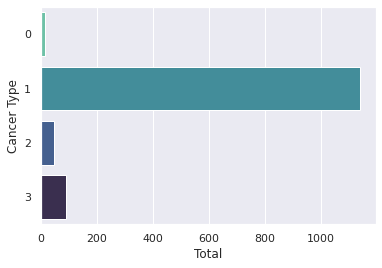

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data= X_train, palette="mako_r")
plt.ylabel('Cancer Type')
plt.xlabel('Total')
plt.show()

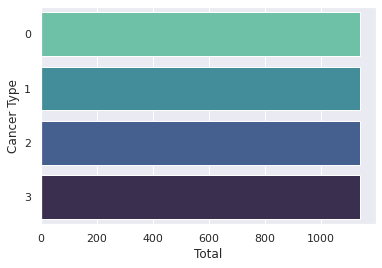

In [ ]:
X_train_2, y_train_2 = SMOTE().fit_resample(X_train, y_train)
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train_2, data= X_train_2, palette="mako_r")
plt.ylabel('Cancer Type')
plt.xlabel('Total')
plt.show()

Logisctic Regression

In [83]:
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))


LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.88      1.00      0.93       301
           2       0.00      0.00      0.00        16
           3       1.00      0.04      0.08        23

    accuracy                           0.88       344
   macro avg       0.47      0.26      0.25       344
weighted avg       0.83      0.88      0.82       344

Logistic Regression accuracy is: 87.79%


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree

In [84]:
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=10)
DTclassifier.fit(X_train, y_train)

y_pred = DTclassifier.predict(X_test)
print(classification_report(y_test, y_pred))

DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.88      0.99      0.93       301
           2       0.00      0.00      0.00        16
           3       1.00      0.09      0.16        23

    accuracy                           0.88       344
   macro avg       0.47      0.27      0.27       344
weighted avg       0.84      0.88      0.83       344

Decision Tree accuracy is: 87.50%


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest

In [85]:
RFclassifier = RandomForestClassifier(max_leaf_nodes=10)
                                      
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)
print(classification_report(y_test, y_pred))

RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.88      1.00      0.93       301
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00        23

    accuracy                           0.88       344
   macro avg       0.22      0.25      0.23       344
weighted avg       0.77      0.88      0.82       344

Random Forest accuracy is: 87.50%


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Support Vector Machine

In [86]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)
print(classification_report(y_test, y_pred))

SVMAcc = accuracy_score(y_pred,y_test)
print('SVM accuracy is: {:.2f}%'.format(SVMAcc*100))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.88      1.00      0.93       301
           2       0.00      0.00      0.00        16
           3       1.00      0.04      0.08        23

    accuracy                           0.88       344
   macro avg       0.47      0.26      0.25       344
weighted avg       0.83      0.88      0.82       344

SVM accuracy is: 87.79%


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K-nearest neighbours

In [87]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

KNNAccuracy = accuracy_score(y_pred,y_test)
print('KNN accuracy is: {:.2f}%'.format(KNNAccuracy*100))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.88      0.99      0.93       301
           2       0.00      0.00      0.00        16
           3       0.40      0.09      0.14        23

    accuracy                           0.87       344
   macro avg       0.32      0.27      0.27       344
weighted avg       0.80      0.87      0.82       344

KNN accuracy is: 87.21%


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#---------------------
#---------------------
#---------------------

------------------------------------------
**K-fold cross validation of each model.**
------------------------------------------

In [88]:
kfold = model_selection.KFold(n_splits=5)
model_kfold = LogisticRegression(max_iter=5000)
results_kfold_LR = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)

kfold = model_selection.KFold(n_splits=5)
model_kfold = DecisionTreeClassifier(max_leaf_nodes=3)
results_kfold_DT = model_selection.cross_val_score(model_kfold, X, y, cv=kfold) 

kfold = model_selection.KFold(n_splits=5)
model_kfold = RandomForestClassifier(max_leaf_nodes=30)
results_kfold_RF = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)

kfold = model_selection.KFold(n_splits=5)
model_kfold = SVC(kernel='linear')
results_kfold_SVM = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)

kfold = model_selection.KFold(n_splits=5)
model_kfold = KNeighborsClassifier(n_neighbors=5)
results_kfold_KNN = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)

print("Logistic Regression's Kfold CV Accuracy: %.2f%%" % (results_kfold_LR.mean()*100.0))  
print("Decision Tree's Kfold CV Accuracy: %.2f%%" % (results_kfold_DT.mean()*100.0)) 
print("Random Forest's Kfold CV Accuracy: %.2f%%" % (results_kfold_RF.mean()*100.0)) 
print("Support Vector's Kfold CV Accuracy: %.2f%%" % (results_kfold_SVM.mean()*100.0))
print("K-nearest Neighbour's Kfold CV Accuracy: %.2f%%" % (results_kfold_KNN.mean()*100.0)) 

Logistic Regression's Kfold CV Accuracy: 87.06%
Decision Tree's Kfold CV Accuracy: 86.99%
Random Forest's Kfold CV Accuracy: 87.12%
Support Vector's Kfold CV Accuracy: 87.30%
K-nearest Neighbour's Kfold CV Accuracy: 86.14%


In [ ]:
#@title
classifier = ['LR','DT' , 'RF' ,'SVM' , 'KNN']
accuracy = [87.06,86.99,87.12,87.30,86.14]
d = {'Classifiers':classifier,'Accuracy':accuracy}
scores = pd.DataFrame(d)
scores

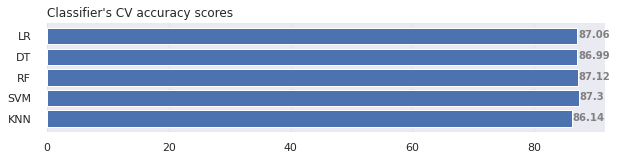

In [90]:
#@title
# Figure Size
fig, ax = plt.subplots(figsize =(10, 2))
 
# Horizontal Bar Plot
ax.barh(classifier, accuracy)
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
# Add Plot Title
ax.set_title("Classifier's CV accuracy scores",
             loc ='left', )
# Show Plot
plt.show() 